# Titanic

In [91]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [92]:
data = pd.read_csv("https://raw.githubusercontent.com/sandespalakat/Datascience/main/Titanic/Data/titanic.csv")

In [93]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [95]:
#"Survived" is the dependant variable

In [96]:
#since Name,PassengerId and Ticket are irrelevant to the survival, we can drop that columns

In [97]:
data.drop(["Name", "Ticket","PassengerId"], axis=1, inplace=True)

In [98]:
data = pd.DataFrame(data)

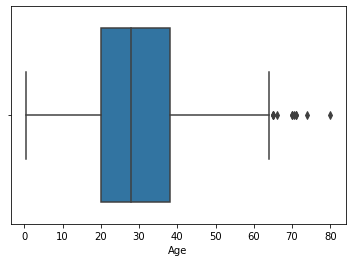

In [99]:
sns.boxplot(data["Age"], orient="v")

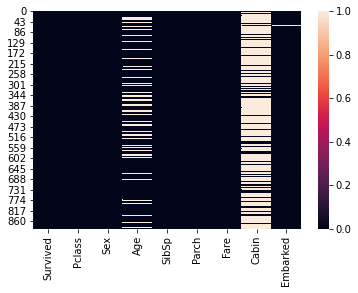

In [100]:
sns.heatmap(data.isnull())

In [101]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [102]:
data.shape

(891, 9)

In [103]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [104]:
data.drop(["Cabin"], axis=1, inplace=True)

In [105]:
data["Embarked"].fillna(data["Embarked"].mode, inplace=True)

In [106]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [107]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [108]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

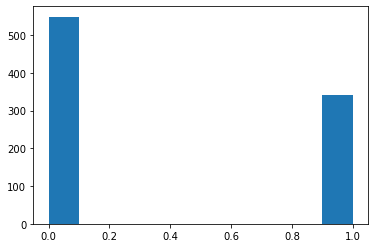

In [109]:
plt.hist(data["Survived"])

In [110]:
#no. of people dies is more than no. of people surviced

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

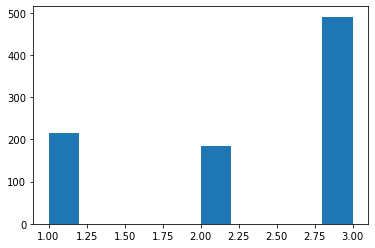

In [111]:
plt.hist(data["Pclass"])

In [112]:
#most of the passangers were 3rd class

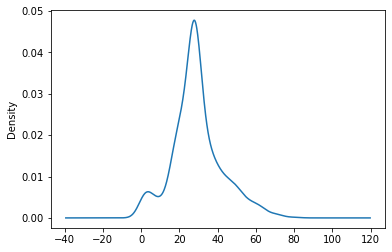

In [113]:
data["Age"].plot(kind="density")

In [114]:
#most of the passanger's age lies between 20-40

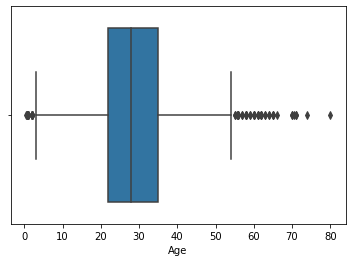

In [115]:
sns.boxplot(data["Age"], orient="v")

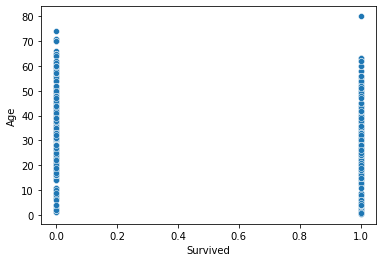

In [116]:
sns.scatterplot( y = data["Age"], x = data["Survived"])

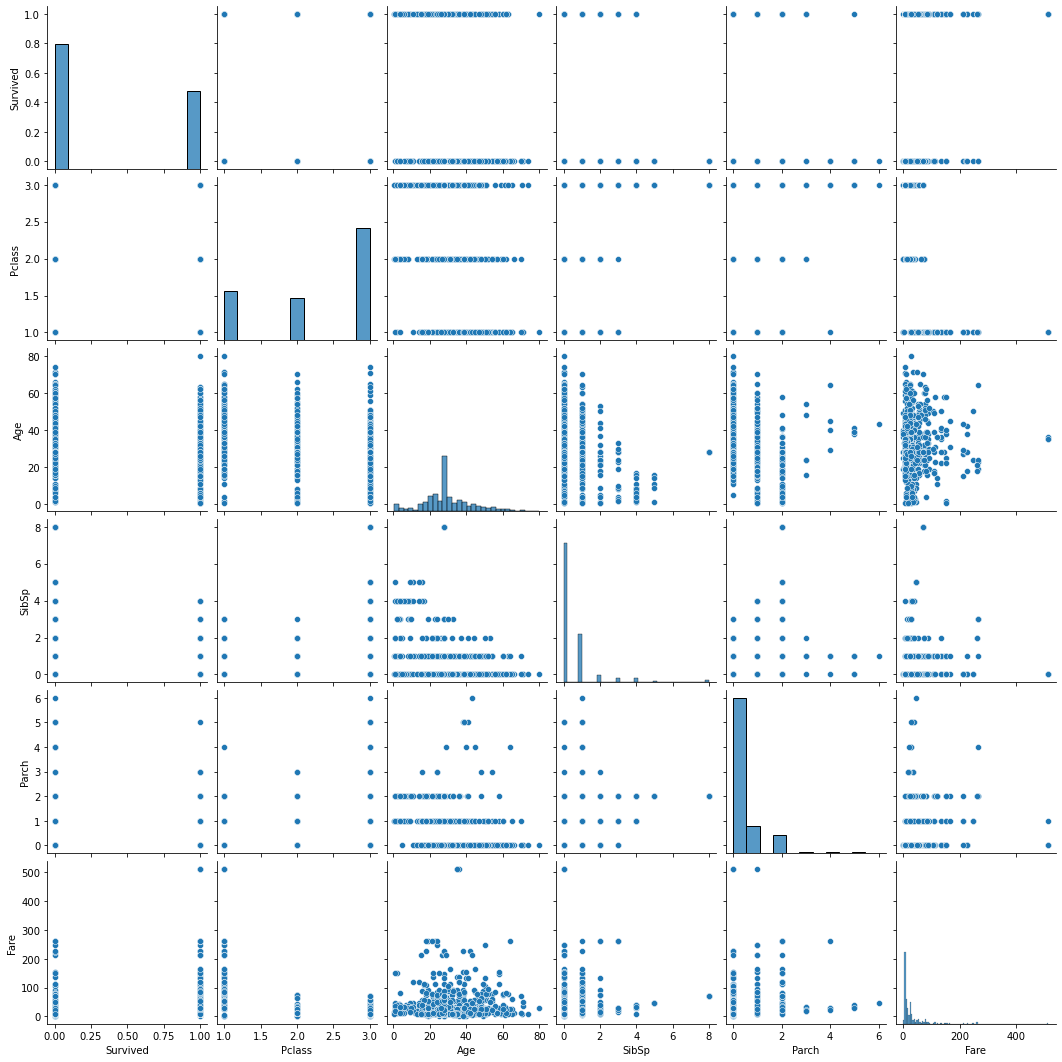

In [117]:
sns.pairplot(data)

In [118]:
corr_data = data.corr()

In [119]:
corr_data

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


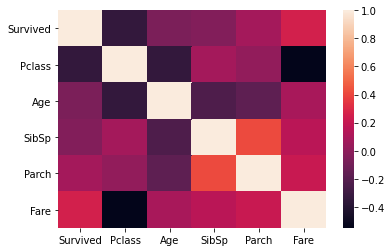

In [120]:
sns.heatmap(corr_data)

In [121]:
#more columns are -vely correleted with the output

In [122]:
data["SibSp"]

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [123]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

since columns are categorical like, we don't need to remove outliers and skewness

In [124]:
from sklearn.preprocessing import LabelEncoder

In [125]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [126]:
le1 = LabelEncoder()
le1.fit(data["Sex"])

LabelEncoder()

In [127]:
data["Sex"] = le1.transform(data["Sex"])

In [128]:
le2 = LabelEncoder()

In [129]:
data["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [130]:
new_emb = []
for i in data["Embarked"]:
    new_emb.append(str(i))

In [131]:
new_emb

['S',
 'C',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'C',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'C',
 'S',
 'Q',
 'S',
 'C',
 'C',
 'Q',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'C',
 'Q',
 'S',
 'Q',
 'Q',
 'C',
 'S',
 'S',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 '<bound method Series.mode of 0      S\n1      C\n2      S\n3      S\n4      S\n      ..\n886    S\n887    S\n888    S\n889    C\n890    Q\nName: Embarked, Length: 891, dtype: object>',
 'S',
 'S',
 'C',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'C',
 'C',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'S',
 'Q',
 'S',
 'C',
 'S',
 'S',
 'C',
 'S',
 'Q',
 'S',
 'C',
 'S',
 'S',
 'S',
 'C',
 'S',
 'S',
 'C',
 'Q',
 'S',
 'C',
 'S',
 'C',
 'S',
 'S',
 'S',
 'S',
 'C',
 'S

In [132]:
le2.fit(new_emb)

LabelEncoder()

In [133]:
data["Embarked"] = le2.transform(new_emb)

In [134]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3
887,1,1,0,19.0,0,0,30.0000,3
888,0,3,0,28.0,1,2,23.4500,3
889,1,1,1,26.0,0,0,30.0000,1


In [135]:
x = data.iloc[:,1:]

In [136]:
y = data.iloc[:,0]

In [137]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 150


In [138]:
#Best random state is 150 

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)

In [140]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.6649746192893401, 'KNN': 0.649746192893401, 'RandomForest': 0.7766497461928934, 'LogisticRegression': 0.7868020304568528, 'naive': 0.751269035532995}


In [141]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [142]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.6723934898762655, 'KNeighborsClassifier()': 0.697052516872891, 'RandomForestClassifier()': 0.8081851096737908, 'LogisticRegression()': 0.7946164932508436, 'GaussianNB()': 0.7856615579302587}


<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>


<table style="width:100%">
  <tr>
    <th>Algorithm</th>
    <th>Accuracy</th> 
    <th>CV Accuracy</th>
     <th>Difference</th>
  </tr>
  <tr style="color:green;">
    <td>SVC</td>
    <td>0.665</td>
    <td>0.672</td>
      <td>0.007</td>
  </tr>
  <tr >
    <td>KNN</td>
    <td>0.650</td>
    <td>0.697</td>
      <td> 0.047</td>
  </tr>
  <tr>
    <td>RandomForest</td>
    <td>0.751</td>
    <td>0.814</td>
      <td>0.063</td>
  </tr>
    <tr>
    <td>LogisticRegression</td>
    <td>0.787</td>
    <td>0.795</td>
      <td>0.008</td>
  </tr>
    <tr>
    <td>Naive Bayes</td>
    <td>0.751</td>
    <td>0.786</td>
      <td>0.035</td>
  </tr>
</table>

</body>
</html>

In [143]:
#Best algorithm is SVC

### Hyper parameter tuning

In [144]:
from sklearn.model_selection import GridSearchCV

In [155]:
parameters = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [156]:
GCV = GridSearchCV(SVC(), parameters, cv=5)

In [157]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [158]:
GCV.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [159]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [160]:
accuracy_score(y_test, GCV_predict)

0.7614213197969543

In [161]:
import joblib

In [162]:
joblib.dump(GCV.best_estimator_, "Titanic.obj")

['Titanic.obj']